In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
df = pd.read_csv("wdbc.data.mb.csv", header=None)                       #obtain entire dataframe
X_d = df.iloc[:, :30].astype(float)                                     #slice the first 30 rows as features dataframe 
_Y = df.iloc[:, -1:].astype(float)                                       #slice the last row as the labels dataframe
normalizer = MinMaxScaler()                                             #initialize minmax normalizer
_X = pd.DataFrame(normalizer.fit_transform(X_d), columns=X_d.columns)    #normalize the features datafame
Y = _Y.to_numpy()
X = _X.to_numpy()

In [80]:
def split_test_train(X, Y, training_set_val='70%', rand_seed=50):
    training_set = float(training_set_val.strip('%')) / 100             #convert character percentage to float
    total_rows = X.shape[0]                                             #get the number of rows of feature data
    train_size = int(training_set * total_rows)                         #calculate the number of training data rows of feature data
    
    rng = np.random.default_rng(rand_seed)                              #initialize random number generator
    sample_array_indices = rng.permutation(X.shape[0])                  #generate random sample array of indices

    train_array = sample_array_indices[0 : train_size]                   #from sample array indices splice the training set X indices
    test_array = sample_array_indices[train_size : total_rows]           #from sample array indices splice the test set Y indices
                                                                         #recall that X and Y are same shape    
    return X[train_array], X[test_array], Y[train_array], Y[test_array]

In [81]:
X_train, X_test, Y_train, Y_test = split_test_train(X, Y,'70%', 0)

In [82]:
def data_distances_calculation(X_train, X_test):                              #calculates the Euclidean distance
    difference_distance = X_test[:, None, :] - X_train[None, :, :]   #between the vectors that represent
    sum_of_difference_distance_squared = np.sum(difference_distance ** 2, axis=2) #the training and test data sets
    return np.sqrt(sum_of_difference_distance_squared)

In [83]:
def assign_knn(k, y_train, calculated_distances):
    #sort distances for each test sample, take indices of k nearest neighbors
    neighbor_indices = np.argsort(calculated_distances, axis=1)[:, :k]   # shape (X_test.shape[0], k)
    
    predictions = []
    for indices in neighbor_indices:                            #iterate over test sample neighbor indices
        labels = y_train[indices]                               #pick labels of neighbors from training set
        values, counts = np.unique(labels, return_counts=True)  # find unique values in neighbor labels and how many times they occur
        max_index = np.argmax(counts)                           # find the index of the maximum number of times the unique value occurs
        predicted_label = values[max_index]                     # obtain the value from the index
        predictions.append(predicted_label)
        
    return np.array(predictions)

In [116]:
def knn_visualizer(predictions, Y_test, _k):
    y_pred = np.array(predictions)
    y_true = np.array(Y_test)
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy (k={_k}): {accuracy:.3f}")

    _confusion_matrix = confusion_matrix(y_true, y_pred)
    labels = np.unique(y_true)

    _df = pd.DataFrame(_confusion_matrix, index=labels, columns=labels)
    plt.figure(figsize=(10,7))
    sns.heatmap(_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (k={_k}), Accuracy={accuracy:.2f}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Accuracy (k=3): 0.967


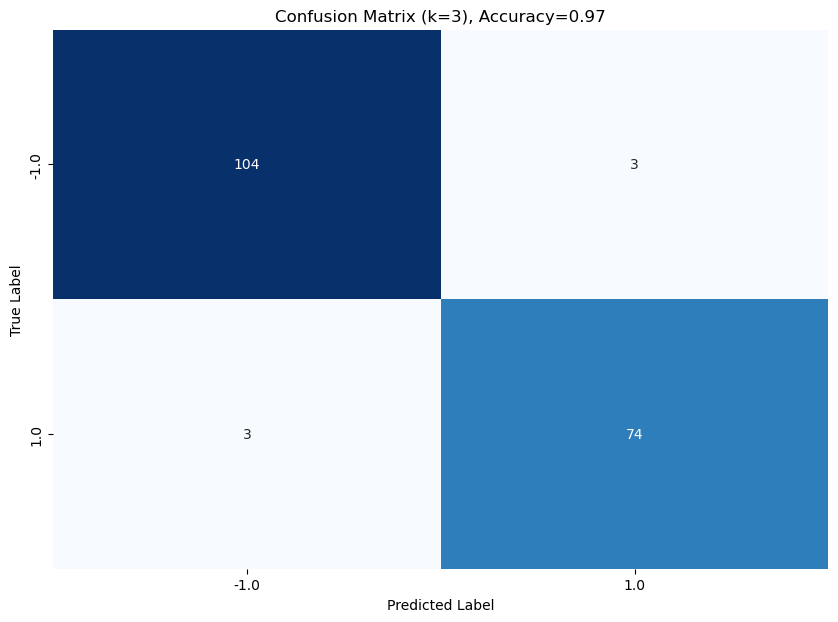

In [117]:
calc_distances = data_distances_calculation(X_train, X_test)
_predictions = assign_knn(3, Y_train, calc_distances)
knn_visualizer(_predictions, Y_test, 3)